<a href="https://colab.research.google.com/github/mosabbeer/data_analysis/blob/main/Website_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data-export (1).csv')
df.head(15)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
6,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
7,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
8,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779
9,Organic Social,2024041321,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900


In [9]:
df.columns=df.iloc[0] #0th row (unnamed rows is removed)
df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group","Datehour","Users","Sessions","Engaged sessions","Average time per session","Engaged Sessions per user","Events per session", "Engagement rate","Event count"]
#changing column names

In [11]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   channel group              3182 non-null   object
 1   Datehour                   3182 non-null   object
 2   Users                      3182 non-null   object
 3   Sessions                   3182 non-null   object
 4   Engaged sessions           3182 non-null   object
 5   Average time per session   3182 non-null   object
 6   Engaged Sessions per user  3182 non-null   object
 7   Events per session         3182 non-null   object
 8   Engagement rate            3182 non-null   object
 9   Event count                3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [15]:
df["Datehour"]=pd.to_datetime(df["Datehour"],format="%Y%m%d%H",errors='coerce')
numeric_cols=df.columns.drop(["channel group","Datehour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["Datehour"].dt.hour

In [16]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channel group              3182 non-null   object        
 1   Datehour                   3182 non-null   datetime64[ns]
 2   Users                      3182 non-null   int64         
 3   Sessions                   3182 non-null   int64         
 4   Engaged sessions           3182 non-null   int64         
 5   Average time per session   3182 non-null   float64       
 6   Engaged Sessions per user  3182 non-null   float64       
 7   Events per session         3182 non-null   float64       
 8   Engagement rate            3182 non-null   float64       
 9   Event count                3182 non-null   int64         
 10  Hour                       3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

In [18]:
df.describe()

,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


**Session and user over time**

In [19]:
sns.set(style="whitegrid")

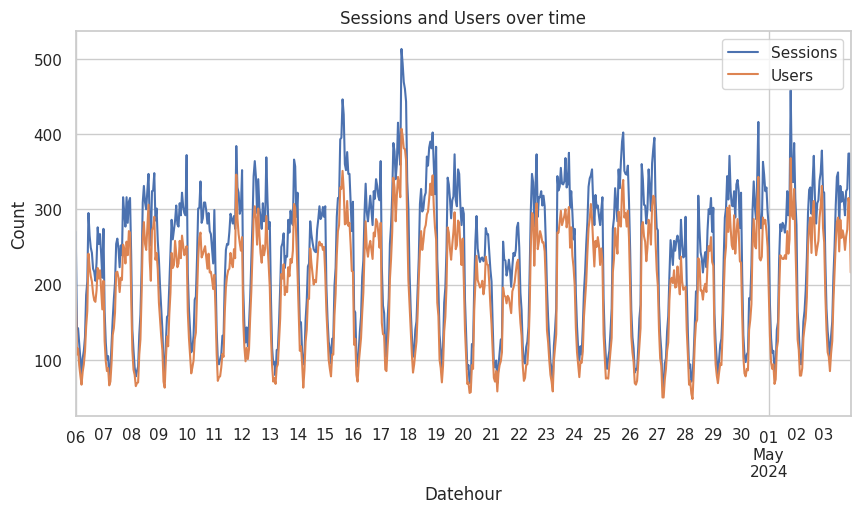

In [24]:
plt.figure(figsize=(10,5))
df.groupby(["Datehour"])[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.ylabel("Count")
plt.xlabel("Datehour")
plt.show()

**Total users by channels**

/tmp/ipython-input-28-3635912597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")


Text(0.5, 0, 'Channel group')

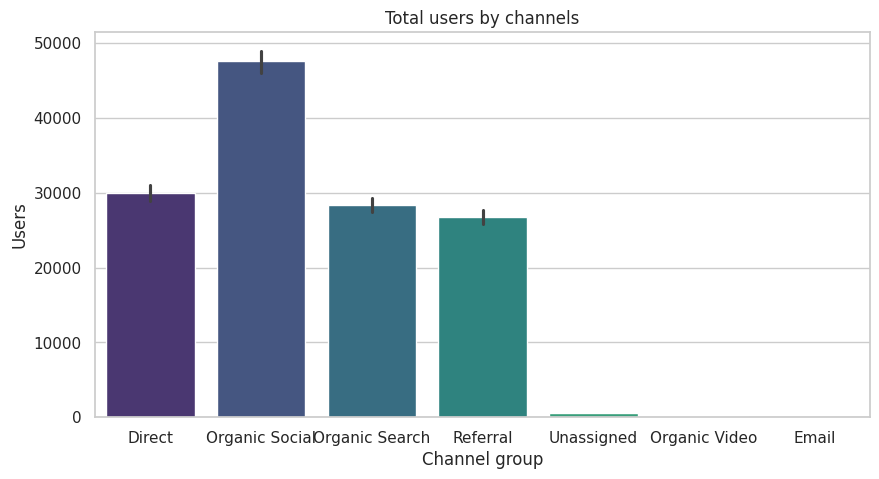

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total users by channels")
plt.ylabel("Users")
plt.xlabel("Channel group")

In [29]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


**Average Angaement time by Channel**

/tmp/ipython-input-31-1791605984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Average time per session",estimator=np.mean,palette="magma")


Text(0.5, 0, 'Channel group')

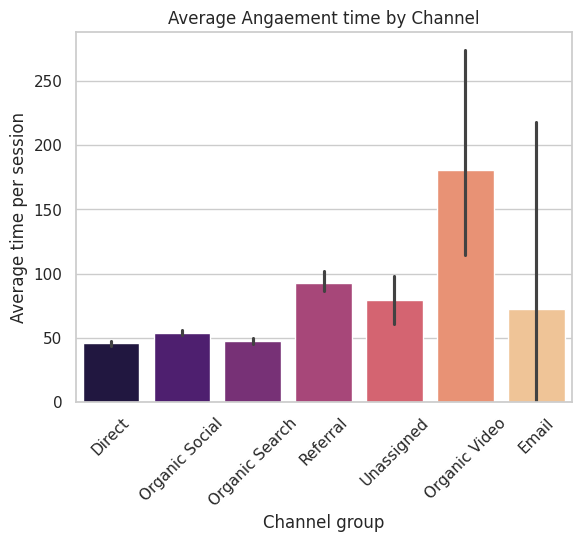

In [31]:
sns.barplot(data=df,x="channel group",y="Average time per session",estimator=np.mean,palette="magma")
plt.title("Average Angaement time by Channel")
plt.ylabel("Average time per session")
plt.xticks(rotation=45)
plt.xlabel("Channel group")

In [32]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


**Engagement Rate Distribution by channel**

/tmp/ipython-input-34-555455535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="channel group",y="Engagement rate",palette="plasma")


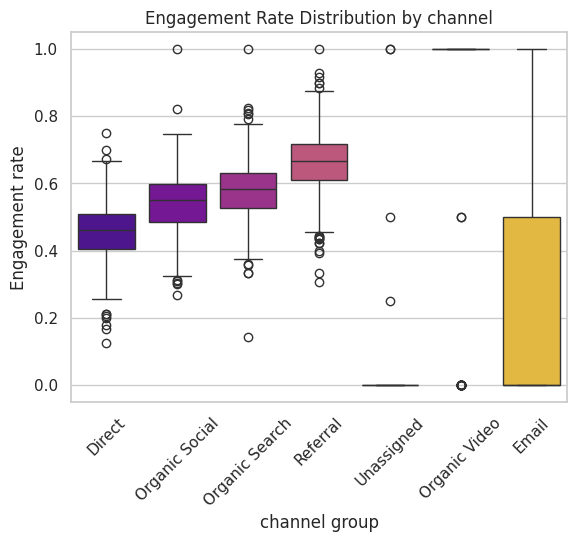

In [34]:
sns.boxplot(data=df,x="channel group",y="Engagement rate",palette="plasma")
plt.title("Engagement Rate Distribution by channel")
plt.ylabel("Engagement rate")
plt.xticks(rotation=45)
plt.show()

In [35]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average time per session,Engaged Sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


**Engaged vs Non-engaged session**

In [36]:
session_df=df.groupby("channel group")[["Sessions","Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"]=session_df["Sessions"]-session_df["Engaged sessions"]
session_df_malted=session_df.melt(id_vars="channel group",value_vars=["Engaged sessions","Non-Engaged"])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Email'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Organic Social'),
  Text(4, 0, 'Organic Video'),
  Text(5, 0, 'Referral'),
  Text(6, 0, 'Unassigned')])

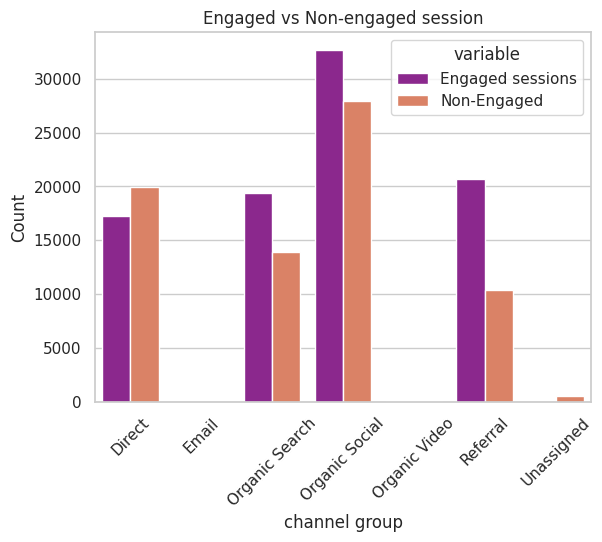

In [37]:
sns.barplot(data=session_df_malted,x="channel group",y="value",hue="variable",palette="plasma")
plt.title("Engaged vs Non-engaged session")
plt.ylabel("Count")
plt.xticks(rotation=45)

**Trafic by hour and channel**

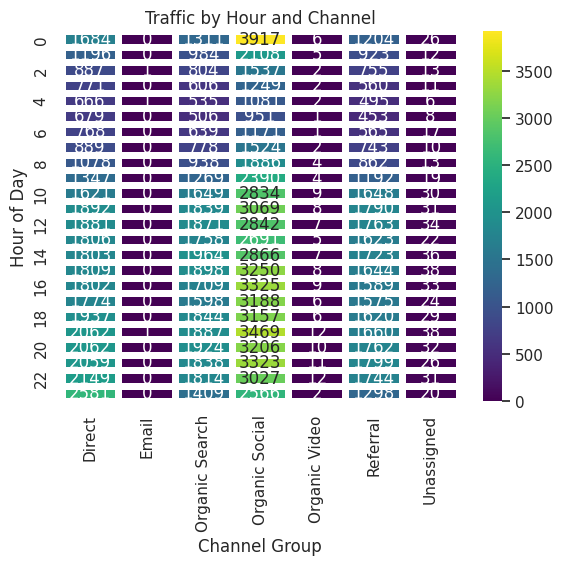

In [40]:
heat_map = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

sns.heatmap(heat_map, annot=True, fmt='.0f', cmap="viridis", linewidths=5)
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()
